In [1]:
import pandas as pd
import sqlite3

In [2]:
con = sqlite3.connect("../data/checking-logs.sqlite")

In [3]:
pag = pd.read_sql("PRAGMA table_info(pageviews);",con=con)
pag

,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,uid,TEXT,0,None,0
2,2,datetime,TIMESTAMP,0,None,0


In [4]:
pagviews = pd.read_sql("SELECT * FROM pageviews WHERE uid LIKE 'user%' ",con=con,parse_dates='datetime')
pagviews

,index,uid,datetime
0,12,user_30,2020-04-17 22:46:26.785035
1,14,user_14,2020-04-18 10:53:52.623447
2,15,user_17,2020-04-18 10:56:55.833899
3,16,user_14,2020-04-18 10:57:37.331258
4,18,user_17,2020-04-18 12:05:48.200144
...,...,...,...
982,1073,user_28,2020-05-21 18:45:20.441142
983,1074,user_19,2020-05-21 23:03:06.457819
984,1075,user_25,2020-05-21 23:23:49.995349
985,1078,user_5,2020-05-22 11:30:18.368990


In [5]:
pagviews['date'] = pagviews['datetime'].dt.date
df = pagviews.groupby(pagviews['date']).count()
df = df.drop(columns=df.columns[-2:])
df = df.rename(columns={'index': 'views'})
df

,views
date,
2020-04-17,1
2020-04-18,23
2020-04-19,15
2020-04-21,3
2020-04-22,1
2020-04-23,5
2020-04-25,1
2020-04-26,8
2020-04-28,2


In [6]:
pagviews1 = pd.read_sql("SELECT * FROM checker WHERE uid LIKE 'user%' ",con=con,parse_dates='timestamp')
pagviews1

,index,status,success,timestamp,numTrials,labname,uid
0,7,ready,0,2020-04-17 05:19:02.744528,1,project1,user_4
1,8,checking,0,2020-04-17 05:22:35.249331,2,project1,user_4
2,9,ready,1,2020-04-17 05:22:45.549397,2,project1,user_4
3,10,checking,1,2020-04-17 05:34:14.691200,3,project1,user_4
4,11,ready,1,2020-04-17 05:34:24.422370,3,project1,user_4
...,...,...,...,...,...,...,...
3202,3397,ready,0,2020-05-21 20:19:06.872761,7,laba06s,user_1
3203,3398,checking,0,2020-05-21 20:22:41.785725,8,laba06s,user_1
3204,3399,ready,0,2020-05-21 20:22:41.877806,8,laba06s,user_1
3205,3400,checking,0,2020-05-21 20:37:00.129678,9,laba06s,user_1


In [7]:
pagviews1['date'] = pagviews1['timestamp'].dt.date
df1 = pagviews1.groupby(pagviews1['date']).count()
df1 = df1.drop(columns=df1.columns[1:])
df1 = df1.rename(columns={'index': 'commit'})
df1

,commit
date,
2020-04-17,23
2020-04-18,69
2020-04-19,33
2020-04-20,25
2020-04-21,25
2020-04-22,28
2020-04-23,43
2020-04-24,16
2020-04-25,104


In [8]:
main_diff = pd.merge(left=df,right=df1,on='date')
main_diff

,views,commit
date,,
2020-04-17,1,23
2020-04-18,23,69
2020-04-19,15,33
2020-04-21,3,25
2020-04-22,1,28
2020-04-23,5,43
2020-04-25,1,104
2020-04-26,8,261
2020-04-28,2,5


<Axes: title={'center': 'Views and commit per day'}, xlabel='date'>

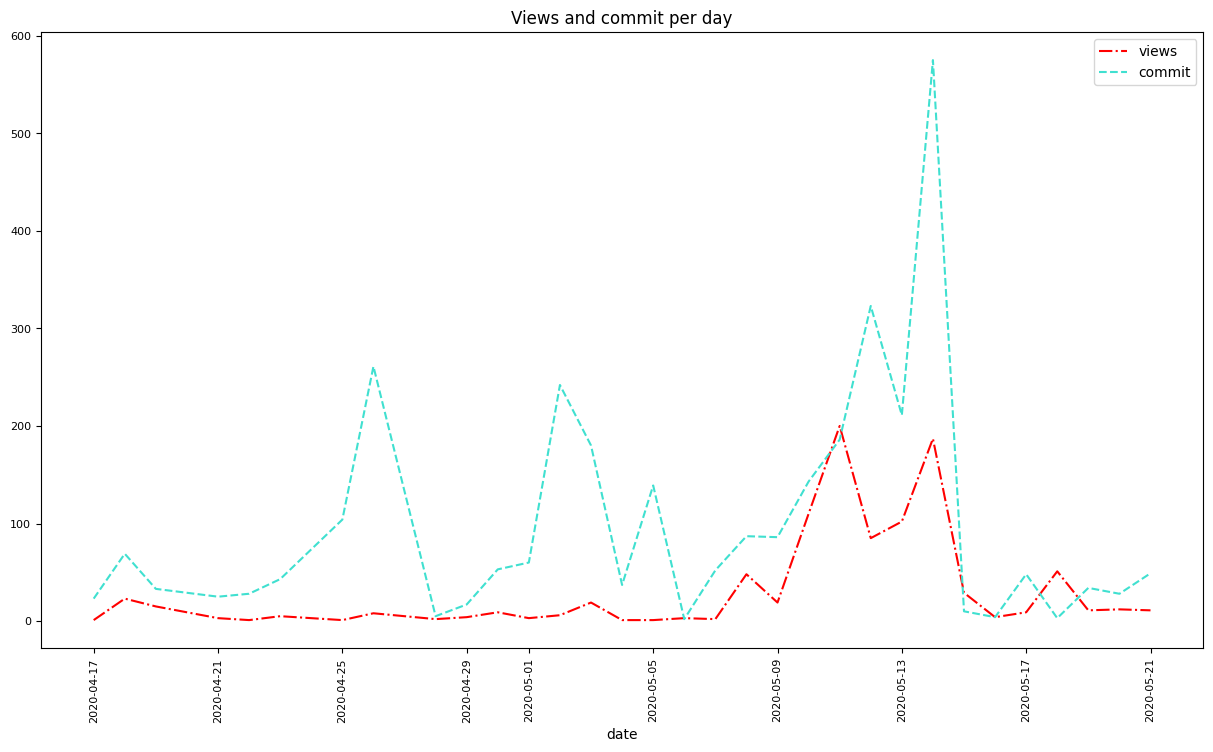

In [9]:

main_diff.plot(title='Views and commit per day',rot=90,fontsize=8,figsize=(15,8),color=['red','#40e0d0'],style=['-.', '--'])

How many times was the number of views larger than 150?

In [10]:
a = df[df['views'] > 150].count()
print(f'The answer is {a.iloc[0]}')

The answer is 2


In [11]:
con.close()